<a href="https://colab.research.google.com/github/Rayonil/Machine_learning_agriculture/blob/main/Machine_learning_in_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importando bibliotecas e carregando conjunto de dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este é um conjunto de dados usado para recomendar a cultura para o solo adequado.

Isto será muito útil na produção agrícola (Agricultura) sem perdas baseadas em ph do solo, chuva, umidade e outros componentes químicos presentes no solo.

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
print('Shape do Dataframe:  ', df.shape)

Shape do Dataframe:   (2200, 8)


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

## **2. Análise exploratória de dados - EDA**

### **2.1. Distribuição dos Dados**


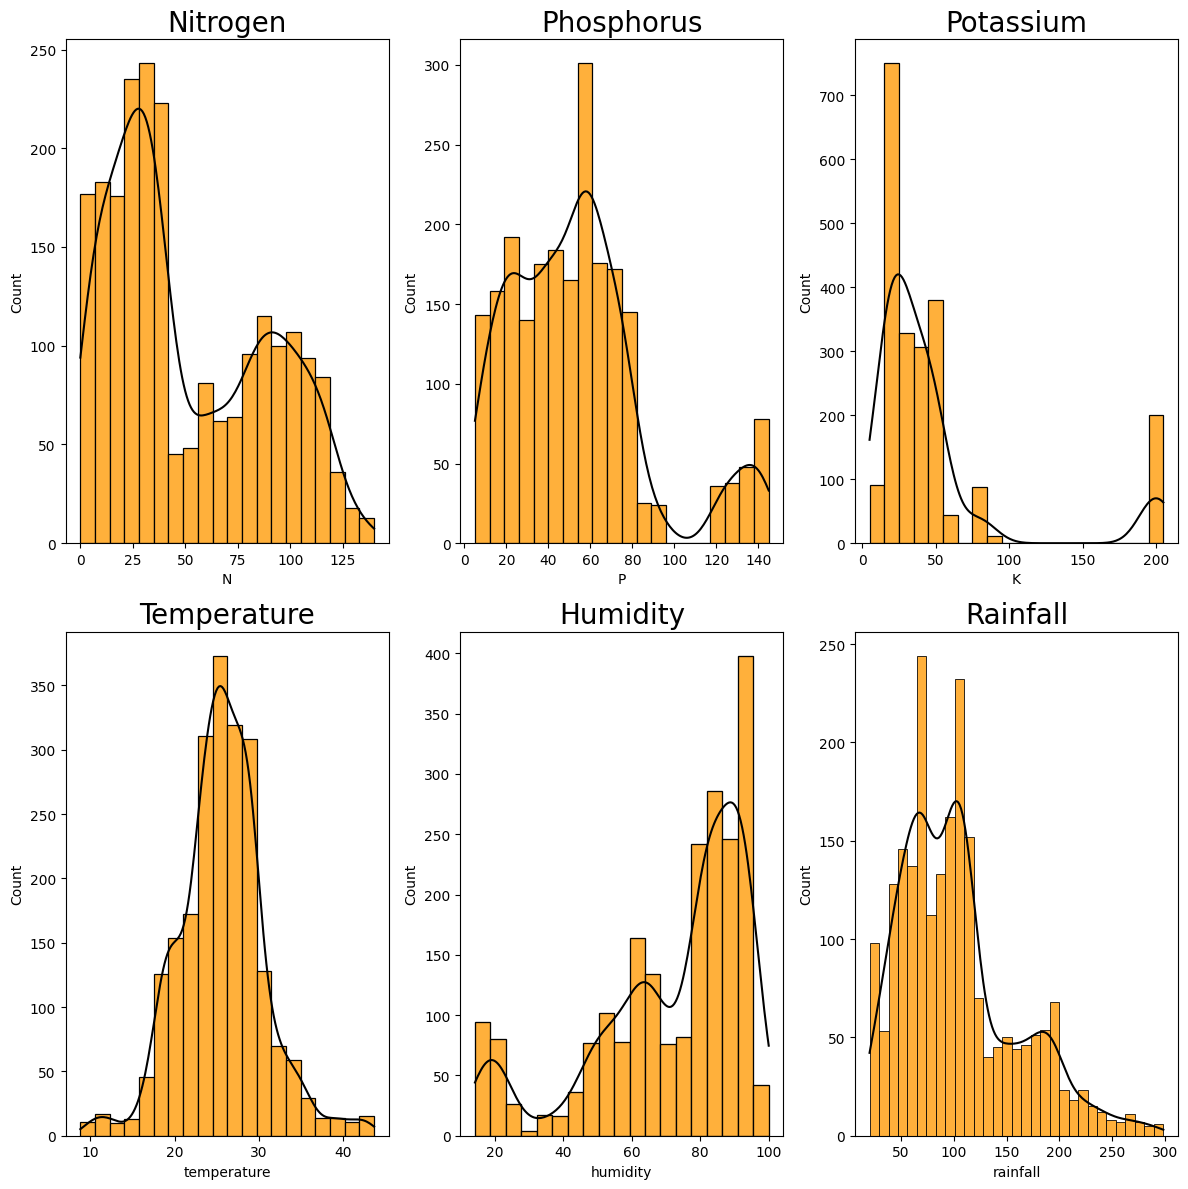

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

sns.histplot(x=df['N'], bins=20, kde=True, edgecolor="black", color='black', facecolor='#ffb03b', ax=axs[0, 0])
axs[0, 0].set_title("Nitrogen", size=20)

sns.histplot(x=df['P'], bins=20, color='black', edgecolor='black', kde=True, facecolor='#ffb03b', ax=axs[0, 1])
axs[0, 1].set_title("Phosphorus", size=20)
axs[0, 1].set_xticks(range(0, 150, 20))

sns.histplot(x=df['K'], kde=True, bins=20, facecolor='#ffb03b', edgecolor='black', color='black', ax=axs[0, 2])
axs[0, 2].set_title("Potassium", size=20)

sns.histplot(x=df['temperature'], bins=20, kde=True, edgecolor="black", color='black', facecolor='#ffb03b', ax=axs[1, 0])
axs[1, 0].set_title("Temperature", size=20)

sns.histplot(x=df['humidity'], color='black', facecolor='#ffb03b', kde=True, edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title("Humidity", size=20)

sns.histplot(x=df['rainfall'], color='black', facecolor='#ffb03b', kde=True, edgecolor='black', ax=axs[1, 2])
axs[1, 2].set_title("Rainfall", size=20)


plt.tight_layout()
plt.show()


### **2.1.1. Verificar as figuras individualmente**

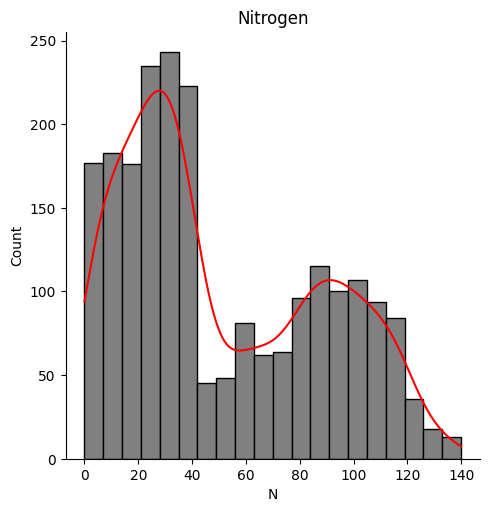

In [25]:
sns.displot(x=df['N'], bins=20,color='red',edgecolor='black',kde=True,facecolor='gray')
plt.title("Nitrogen",size=12)
plt.show()

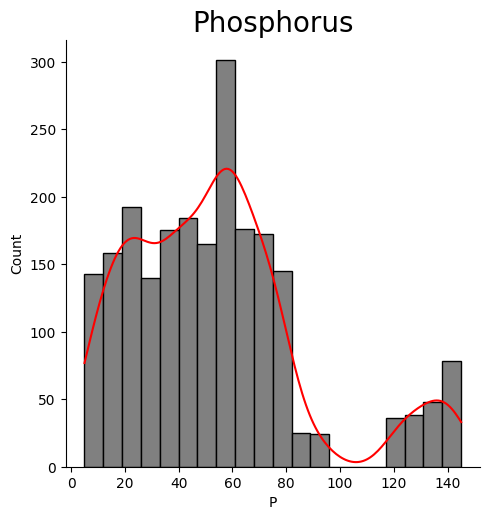

In [26]:
sns.displot(x=df['P'],bins=20,color='red',edgecolor='black',kde=True,facecolor='gray')
plt.title("Phosphorus", size=20)
plt.xticks(range(0,150,20))
plt.show()

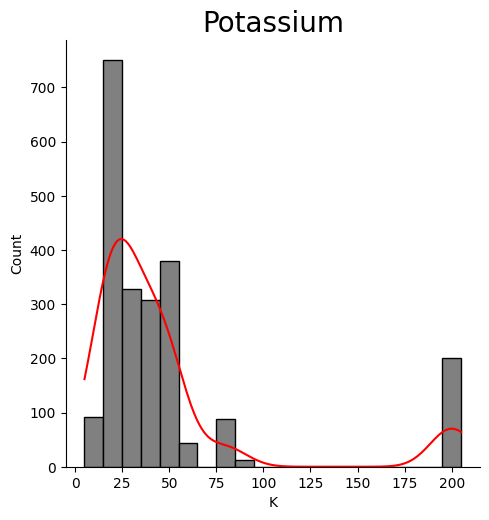

In [29]:
sns.displot(x=df['K'], bins=20, color='red',edgecolor='black',kde=True,facecolor='gray')
plt.title("Potassium",size=20)
plt.show()

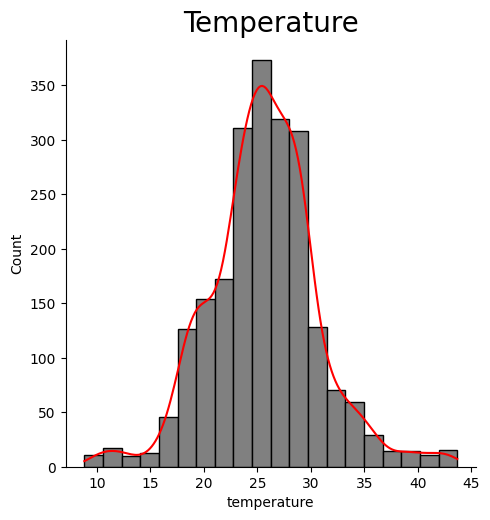

In [30]:
sns.displot(x=df['temperature'], bins=20, color='red',edgecolor='black',kde=True,facecolor='gray')
plt.title("Temperature",size=20)
plt.show()

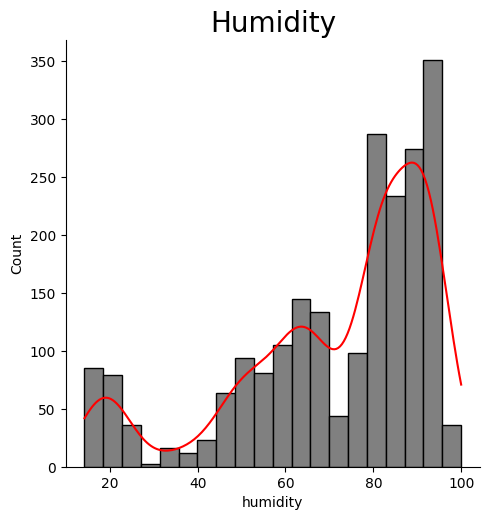

In [31]:
sns.displot(x=df['humidity'], bins=20, color='red',edgecolor='black',kde=True,facecolor='gray')
plt.title("Humidity",size=20)
plt.show()

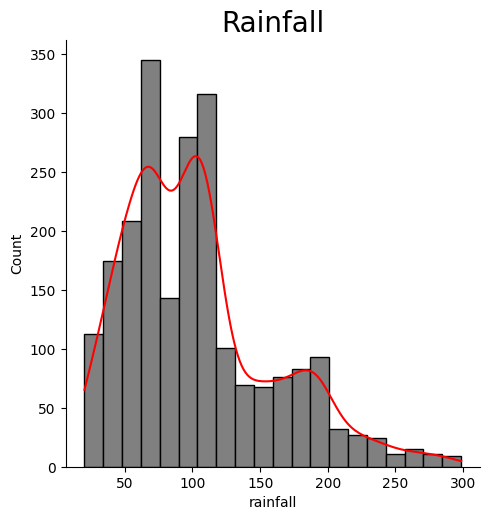

In [32]:
sns.displot(x=df['rainfall'], bins=20, color='red',edgecolor='black',kde=True,facecolor='gray')
plt.title("Rainfall",size=20)
plt.show()

### **2.2. plot categórico**

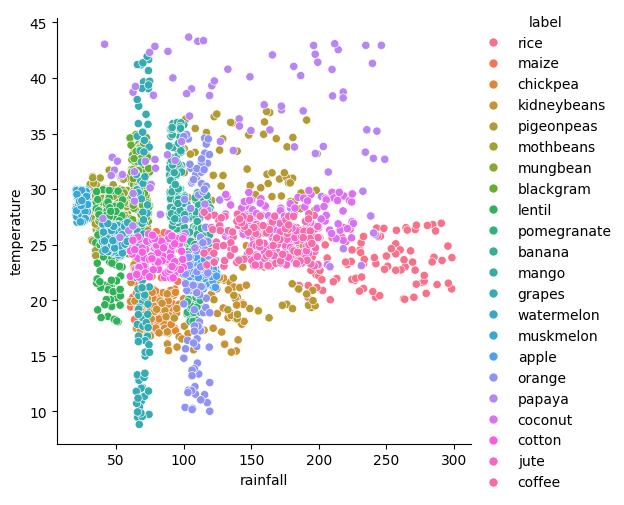

In [33]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

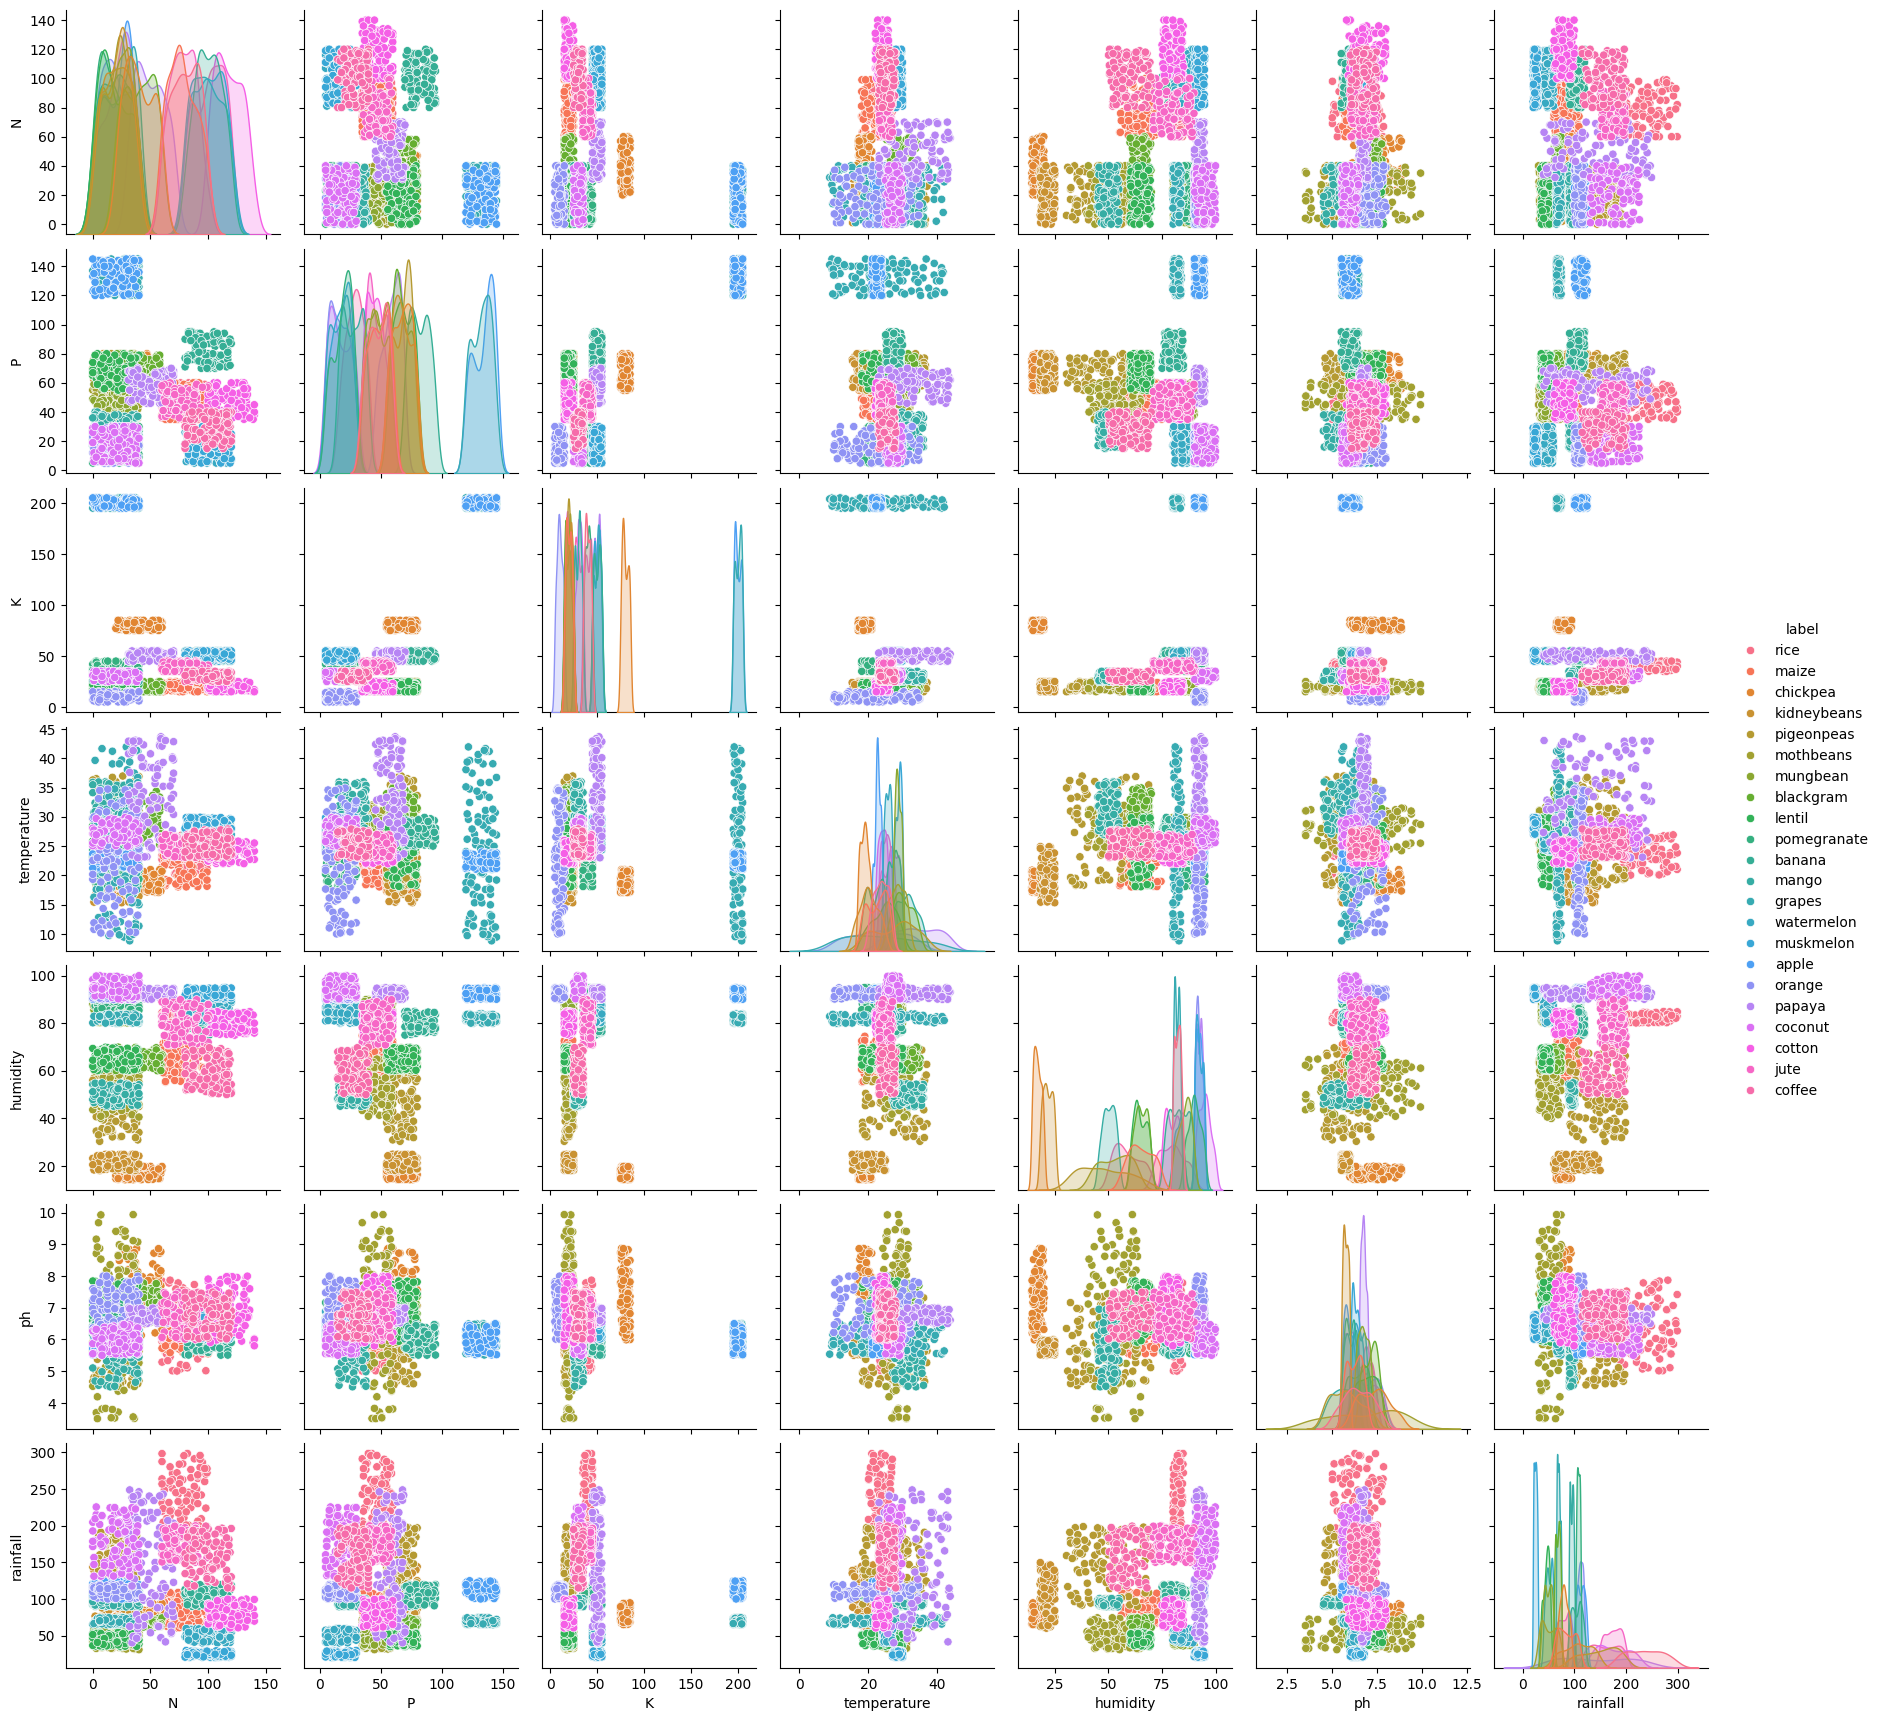

In [34]:
sns.pairplot(data=df,hue='label')
plt.show()

### **2.3. Detecção de outlier usando gráficos**

In [37]:
# Valores exclusivos na coluna do rótulo

crops = df['label'].unique()
print('Quantidade de labels: ', len(crops))
print('labels: ', crops)
print(pd.value_counts(df['label']))

Quantidade de labels:  22
labels:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [40]:
# Filtrando cada rótulo único e armazenando-o em uma lista df2 para traçar o box plot

df2=[] # Criar uma lista vazia - df2
for i in crops:
    df2.append(df[df['label'] == i])


df2 é uma lista de dataframes.

Em que, cada dataframe da lista contem as informações de cada cultura (label)

In [45]:
df2[0].head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


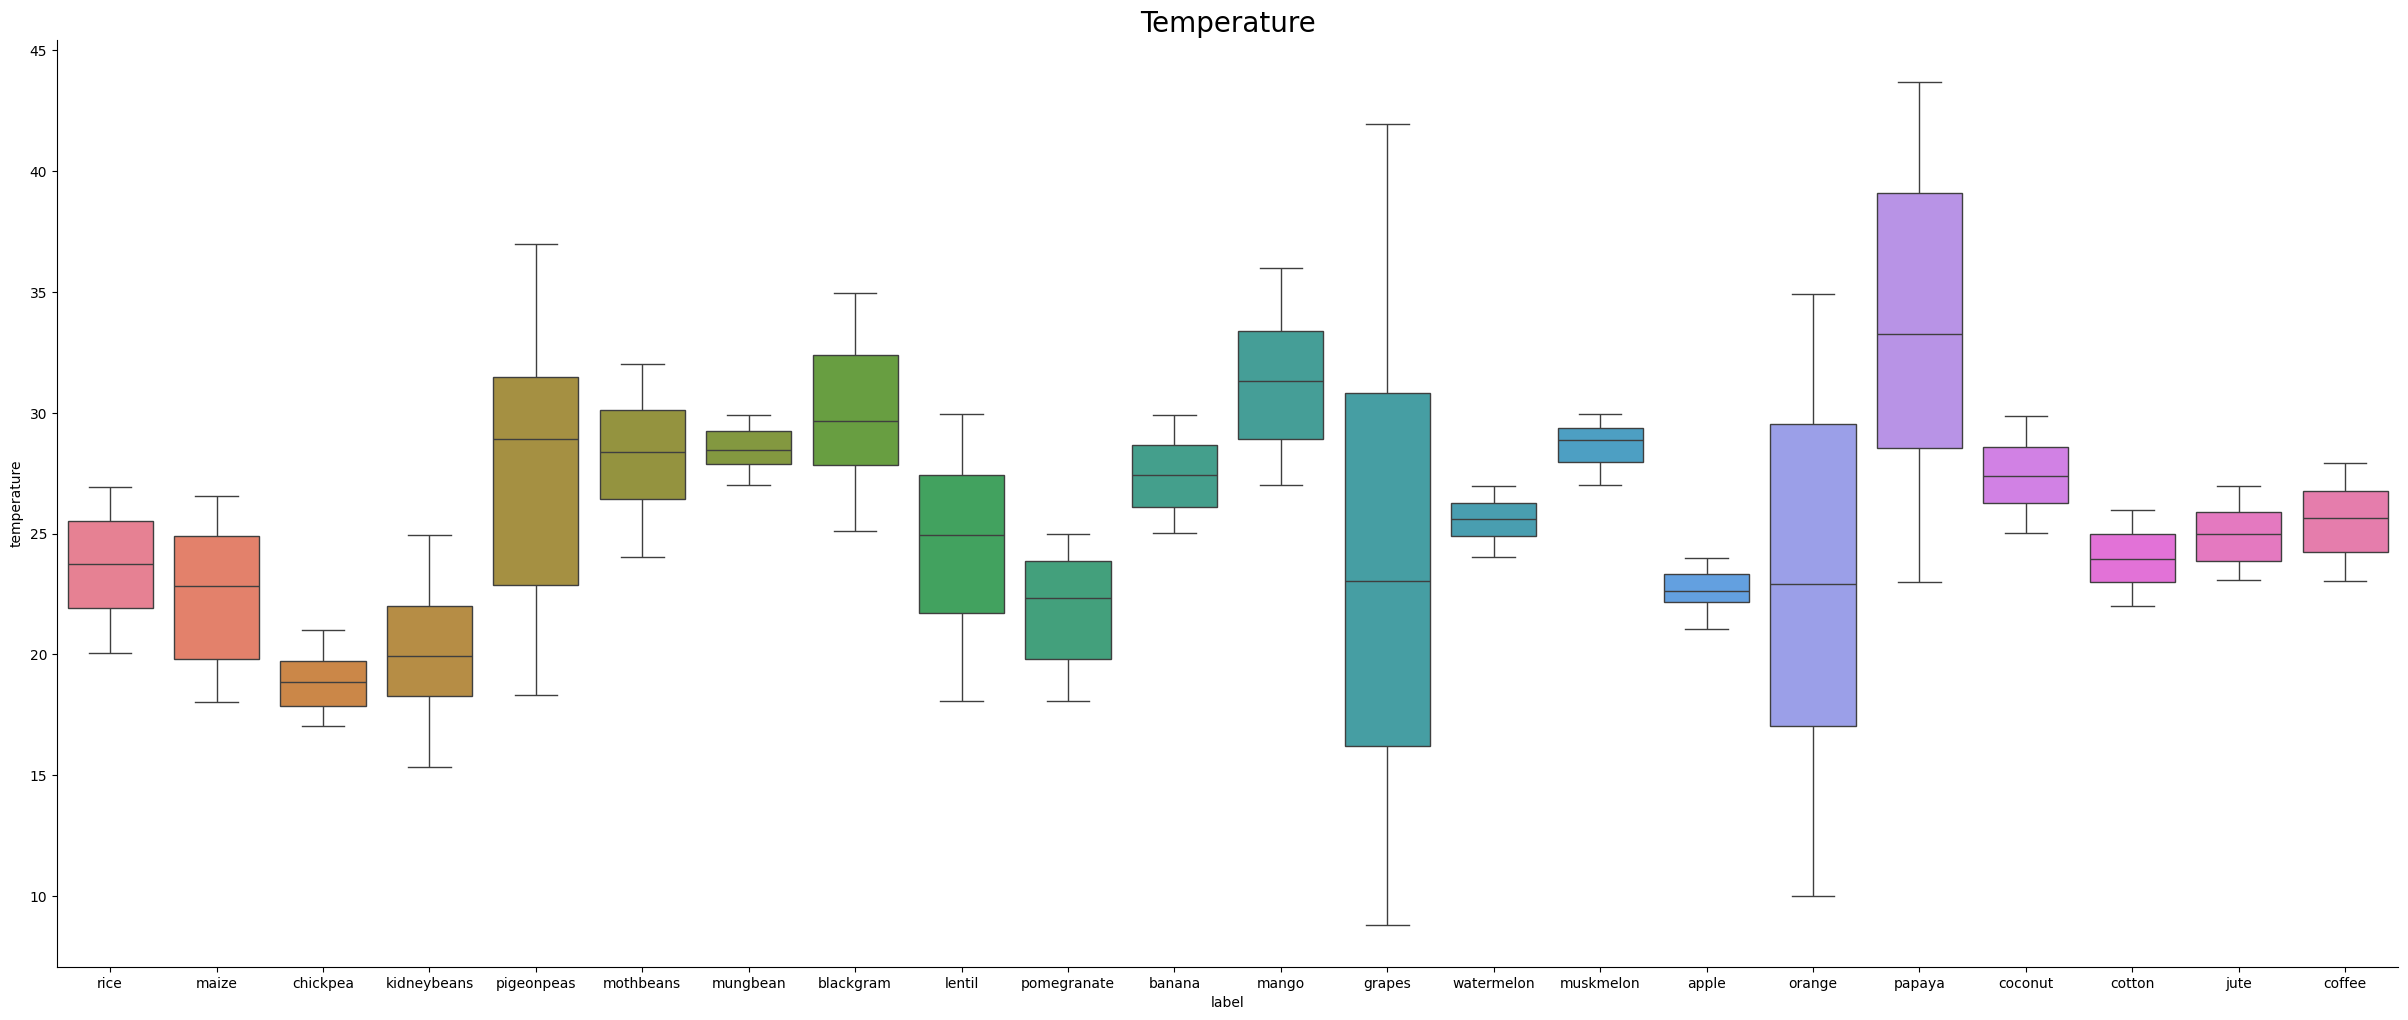

In [48]:
sns.catplot(data=df, x='label', y='temperature', kind='box', height=10, aspect=20/8.27,
            hue='label')
plt.title("Temperature", size=20)
plt.show()

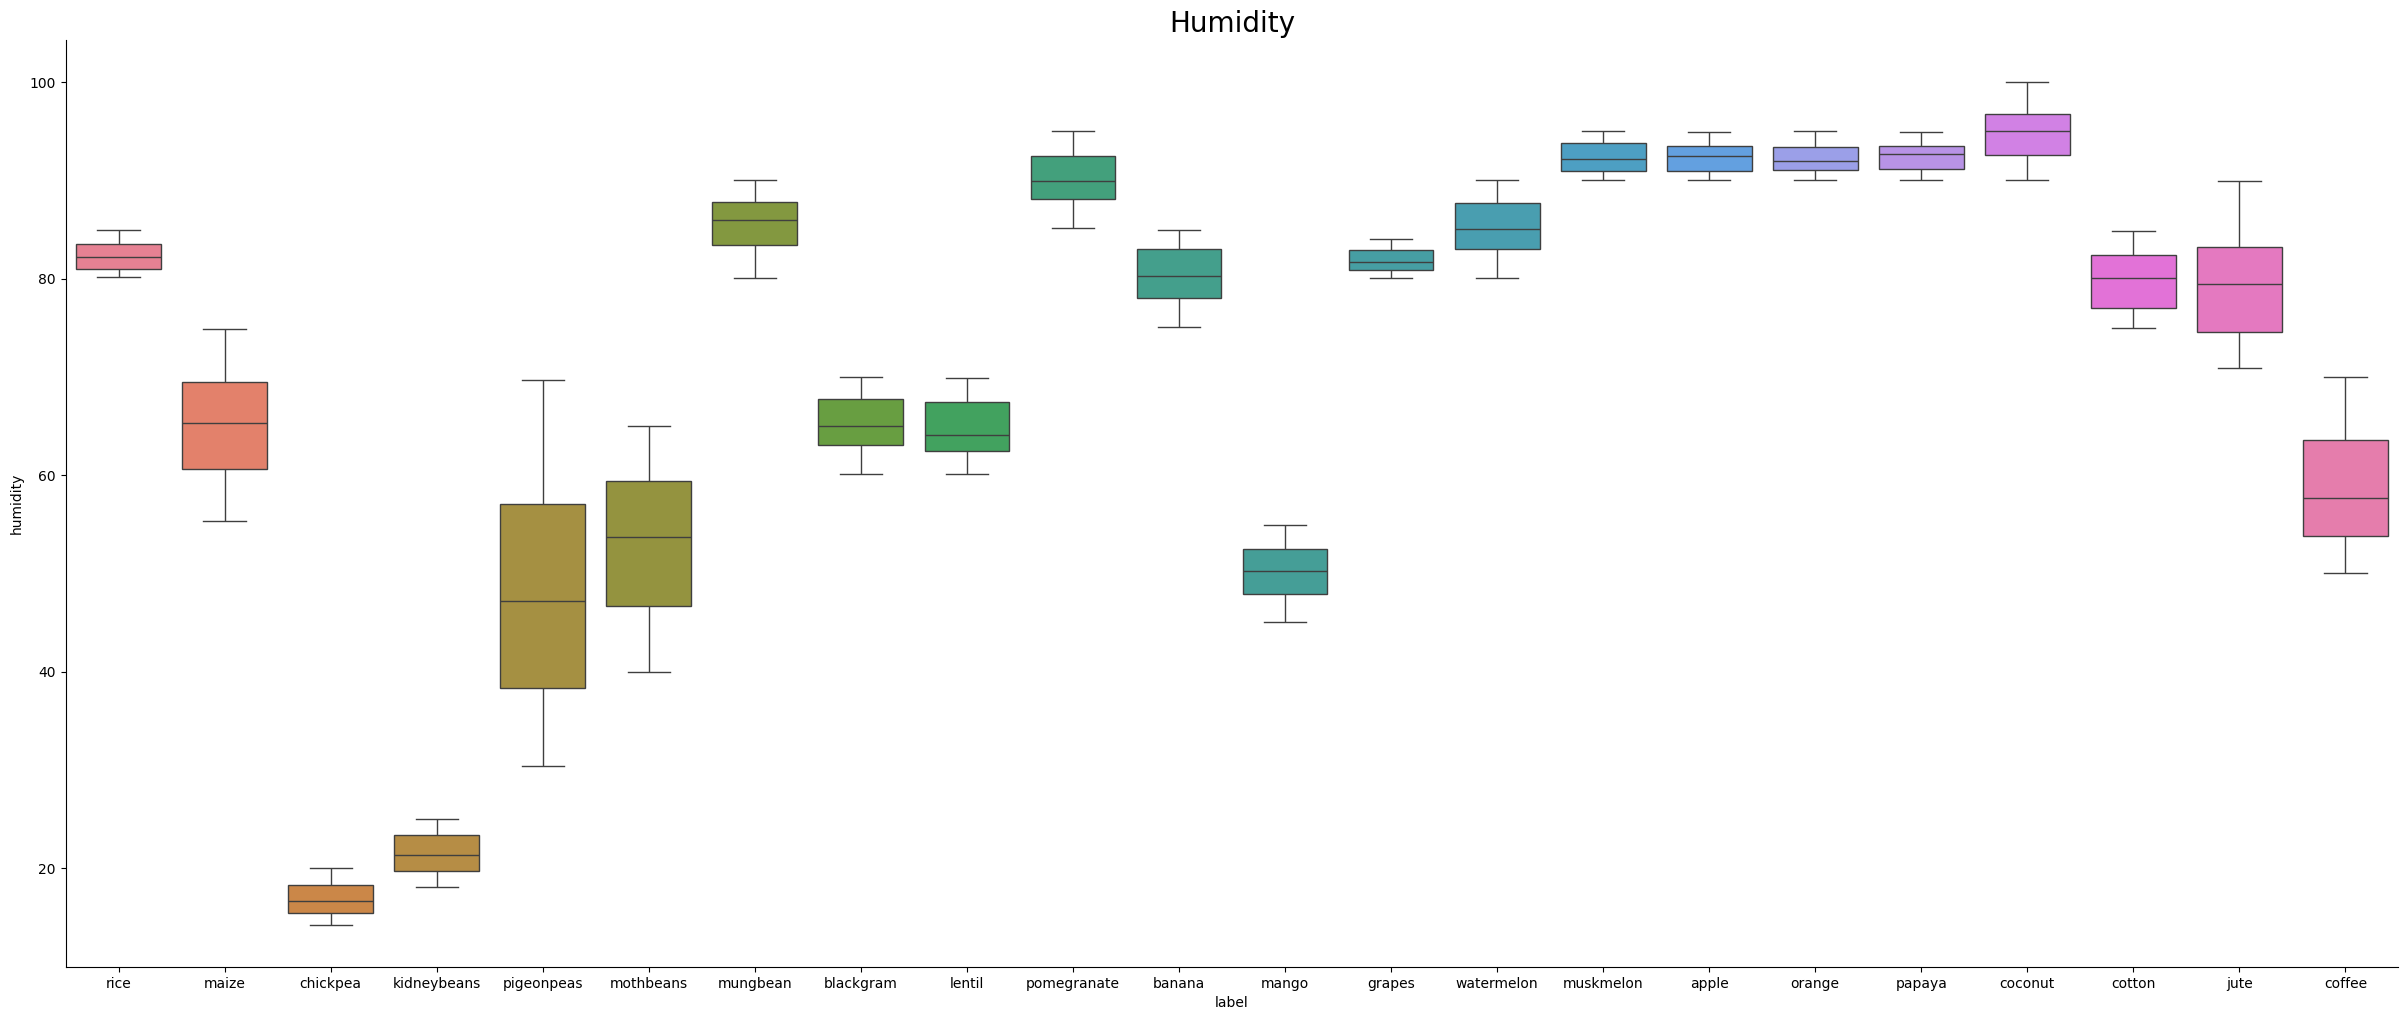

In [49]:
sns.catplot(data=df, x='label', y='humidity', kind='box', height=10, aspect=20/8.27, hue='label')
plt.title("Humidity", size=20)
plt.show()

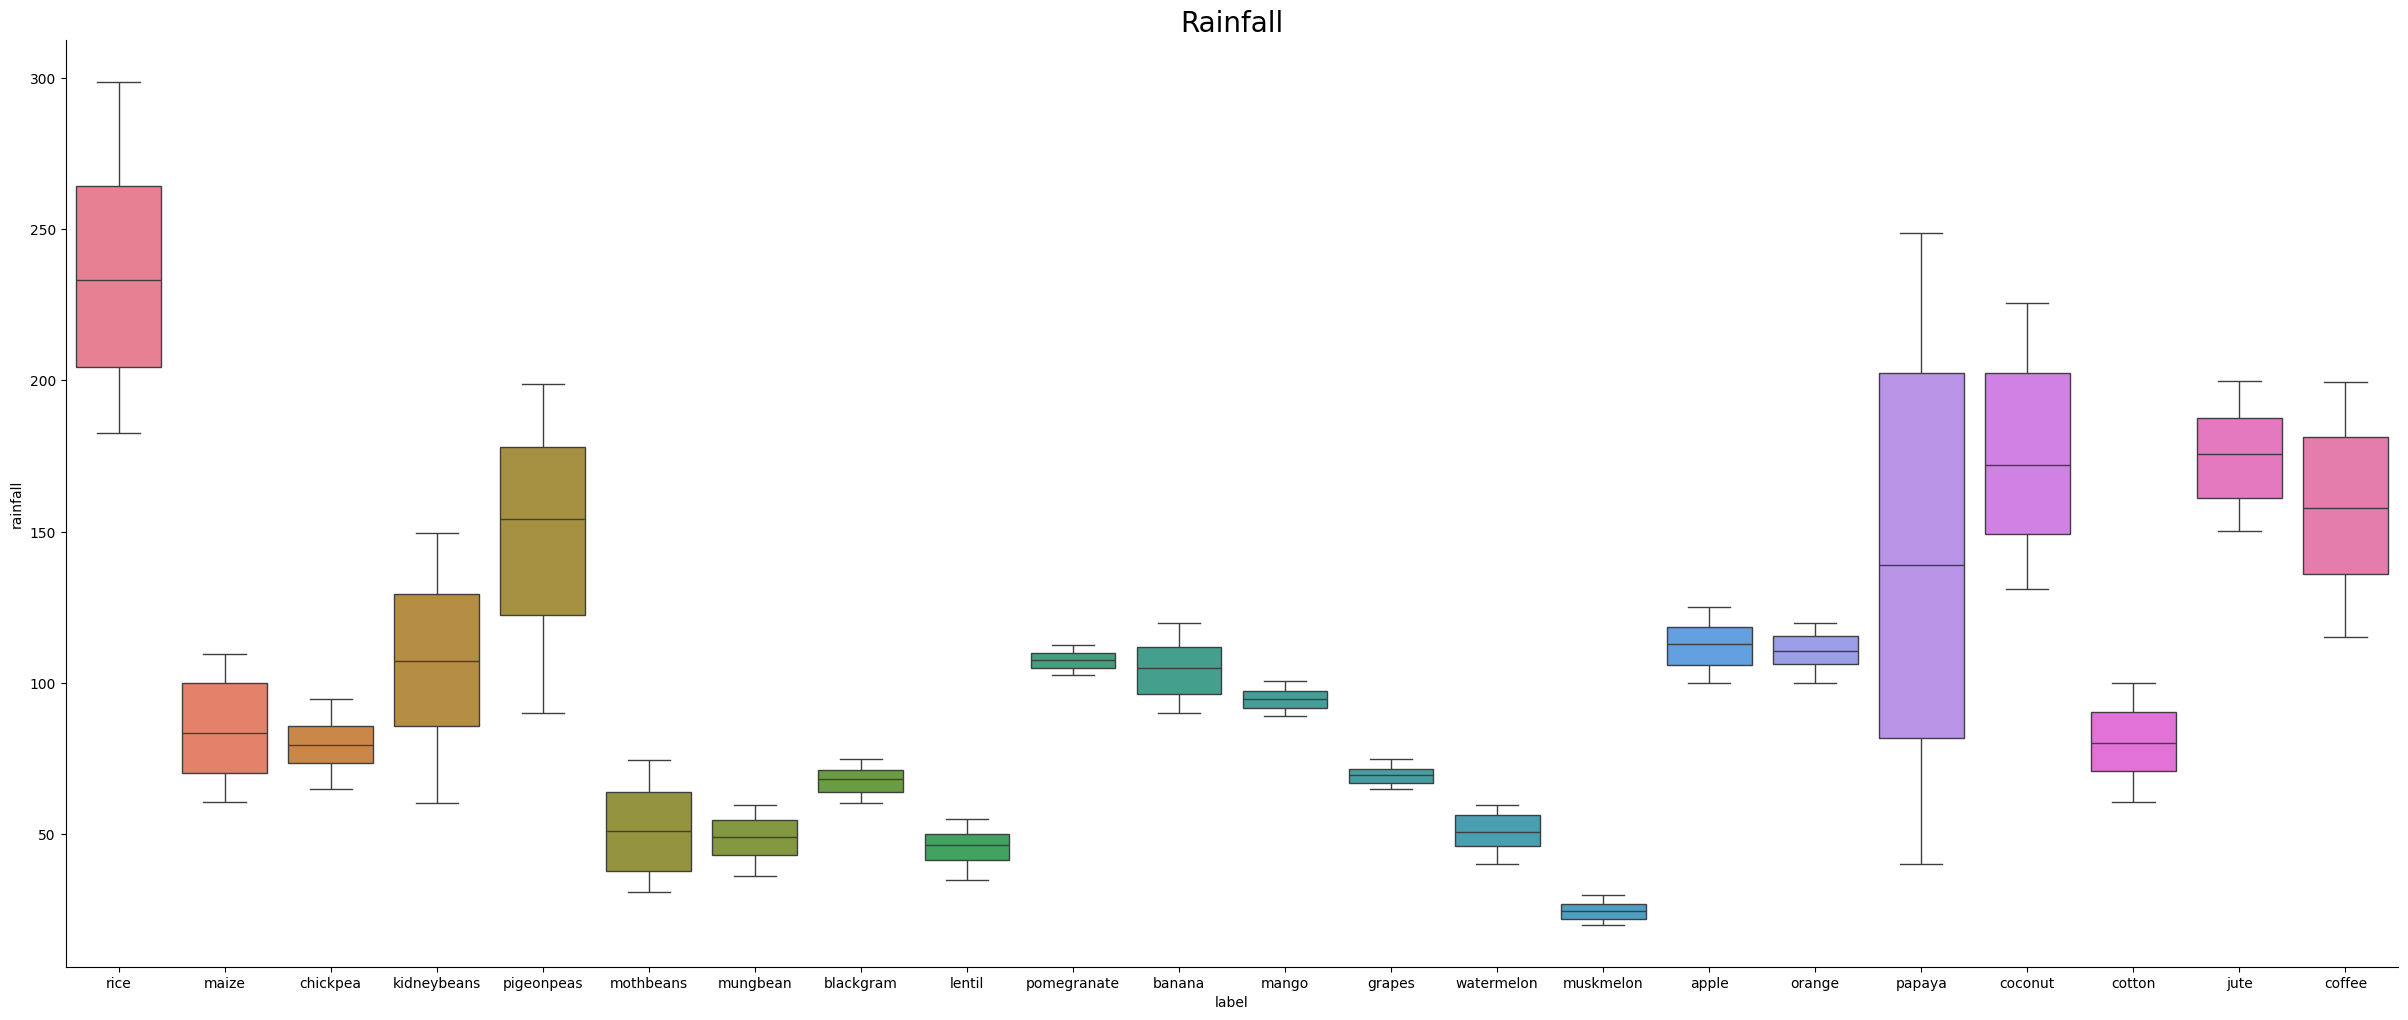

In [56]:
sns.catplot(data=df, x='label', y='rainfall', kind='box', height=10, aspect=20/8.27,  hue='label')
# plt.xticks(rotation='vertical')
plt.title("Rainfall", size=20)
plt.show()

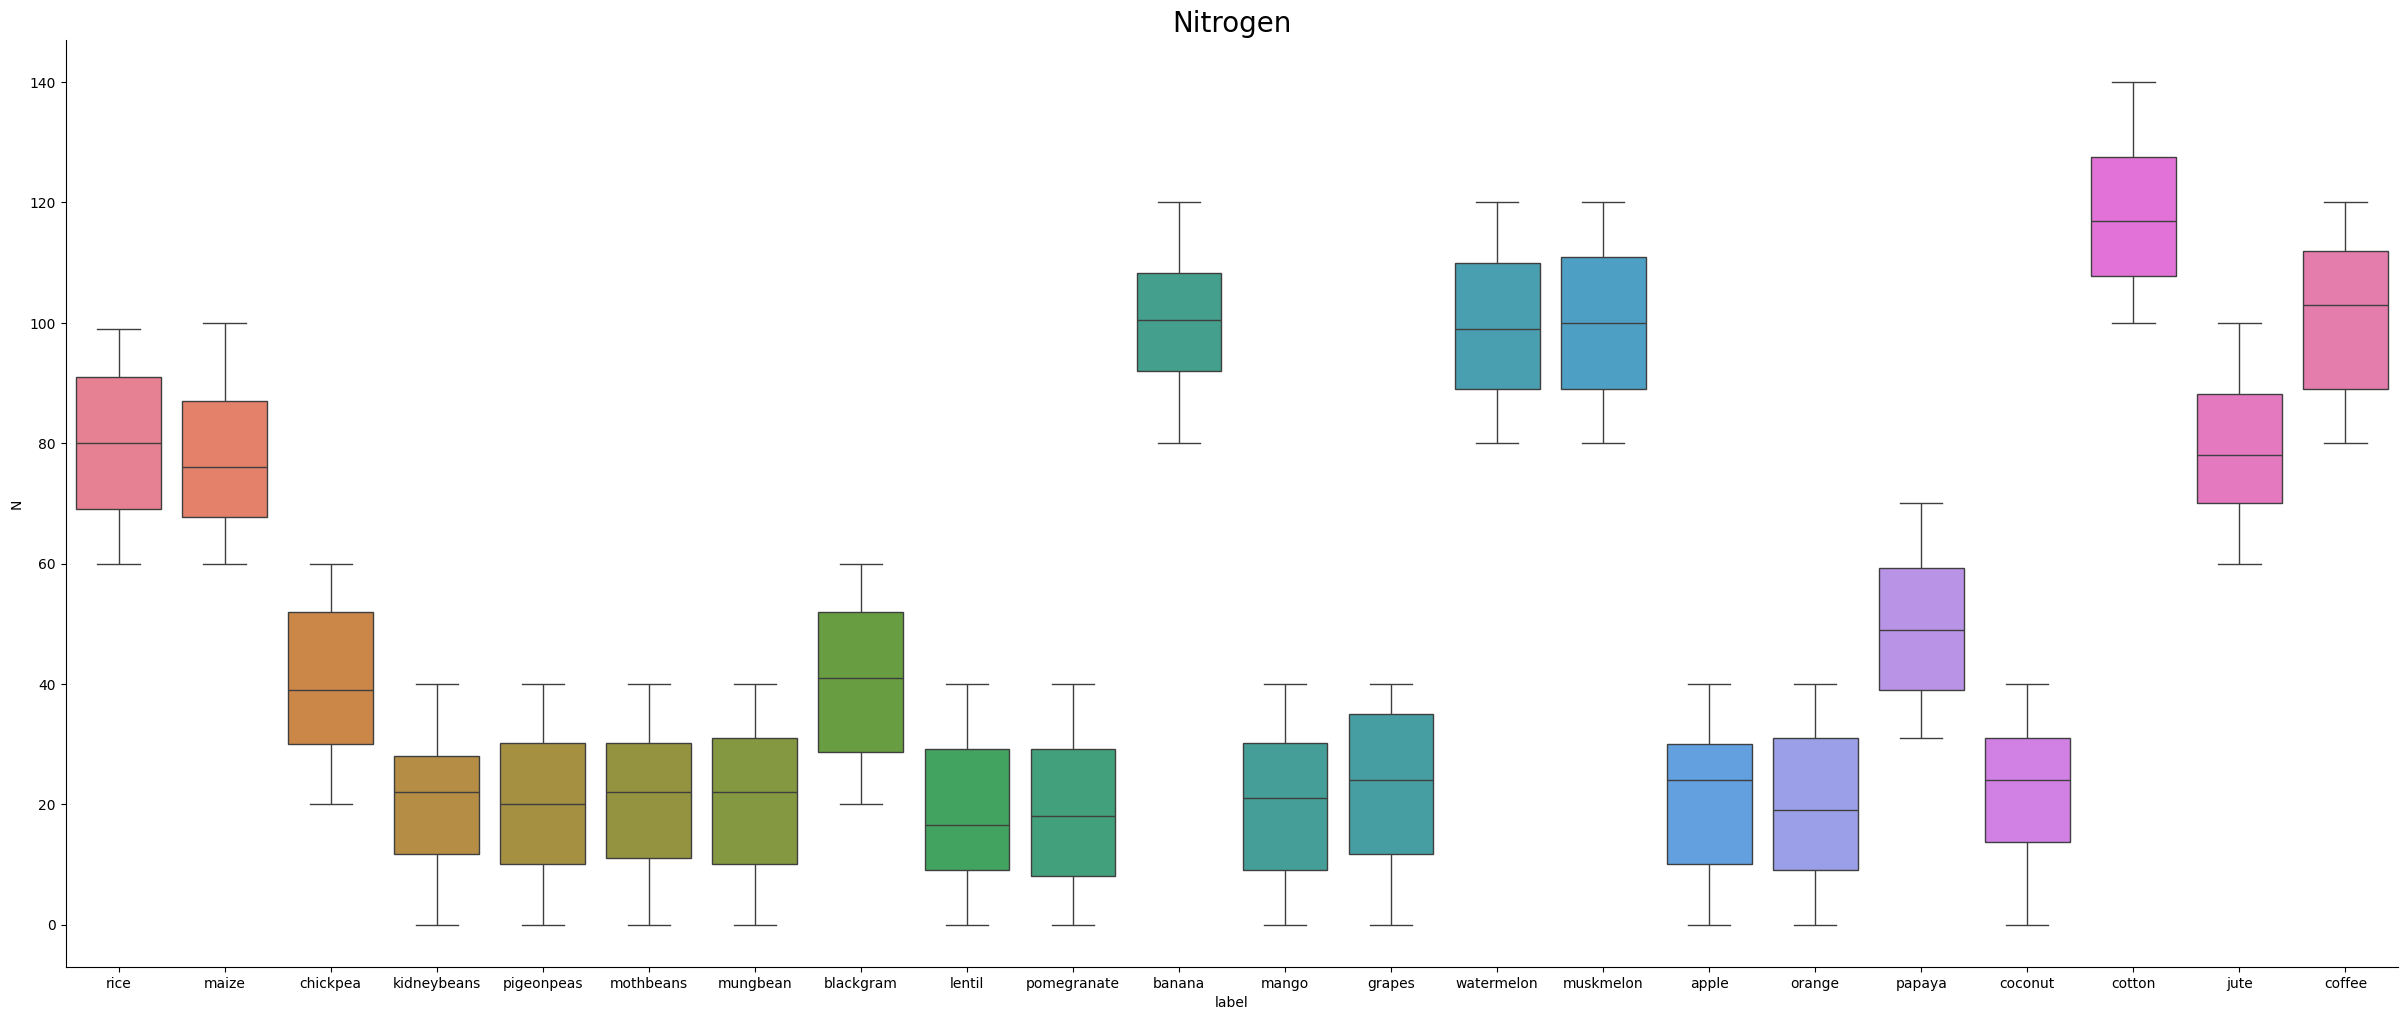

In [51]:
sns.catplot(data=df, x='label', y='N', kind='box', height=10, aspect=20/8.27,  hue='label')
plt.title("Nitrogen",size=20)
plt.show()

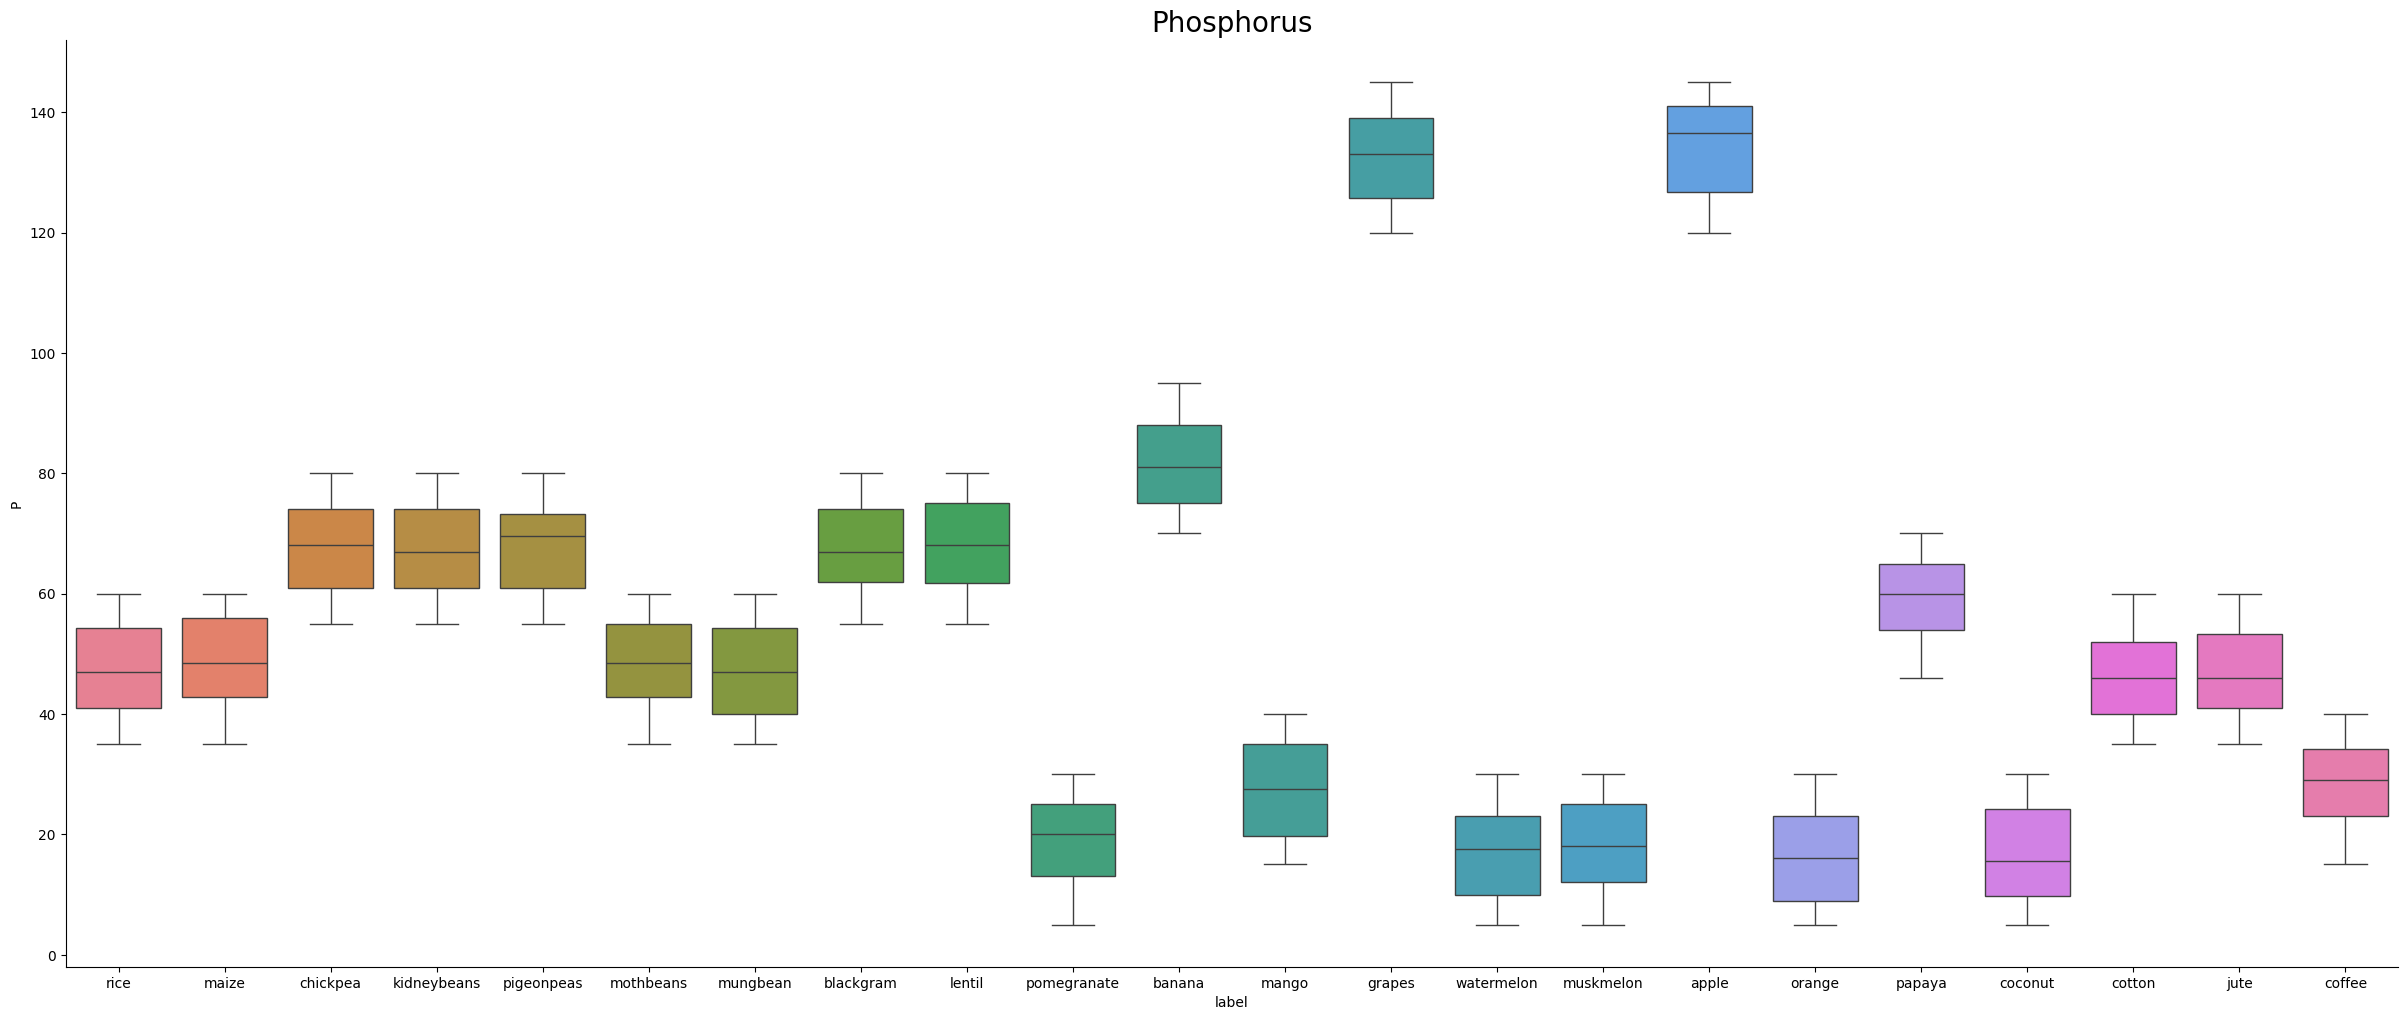

In [52]:
sns.catplot(data=df, x='label', y='P', kind='box', height=10, aspect=20/8.27,  hue='label')
plt.title("Phosphorus",size=20)
plt.show()

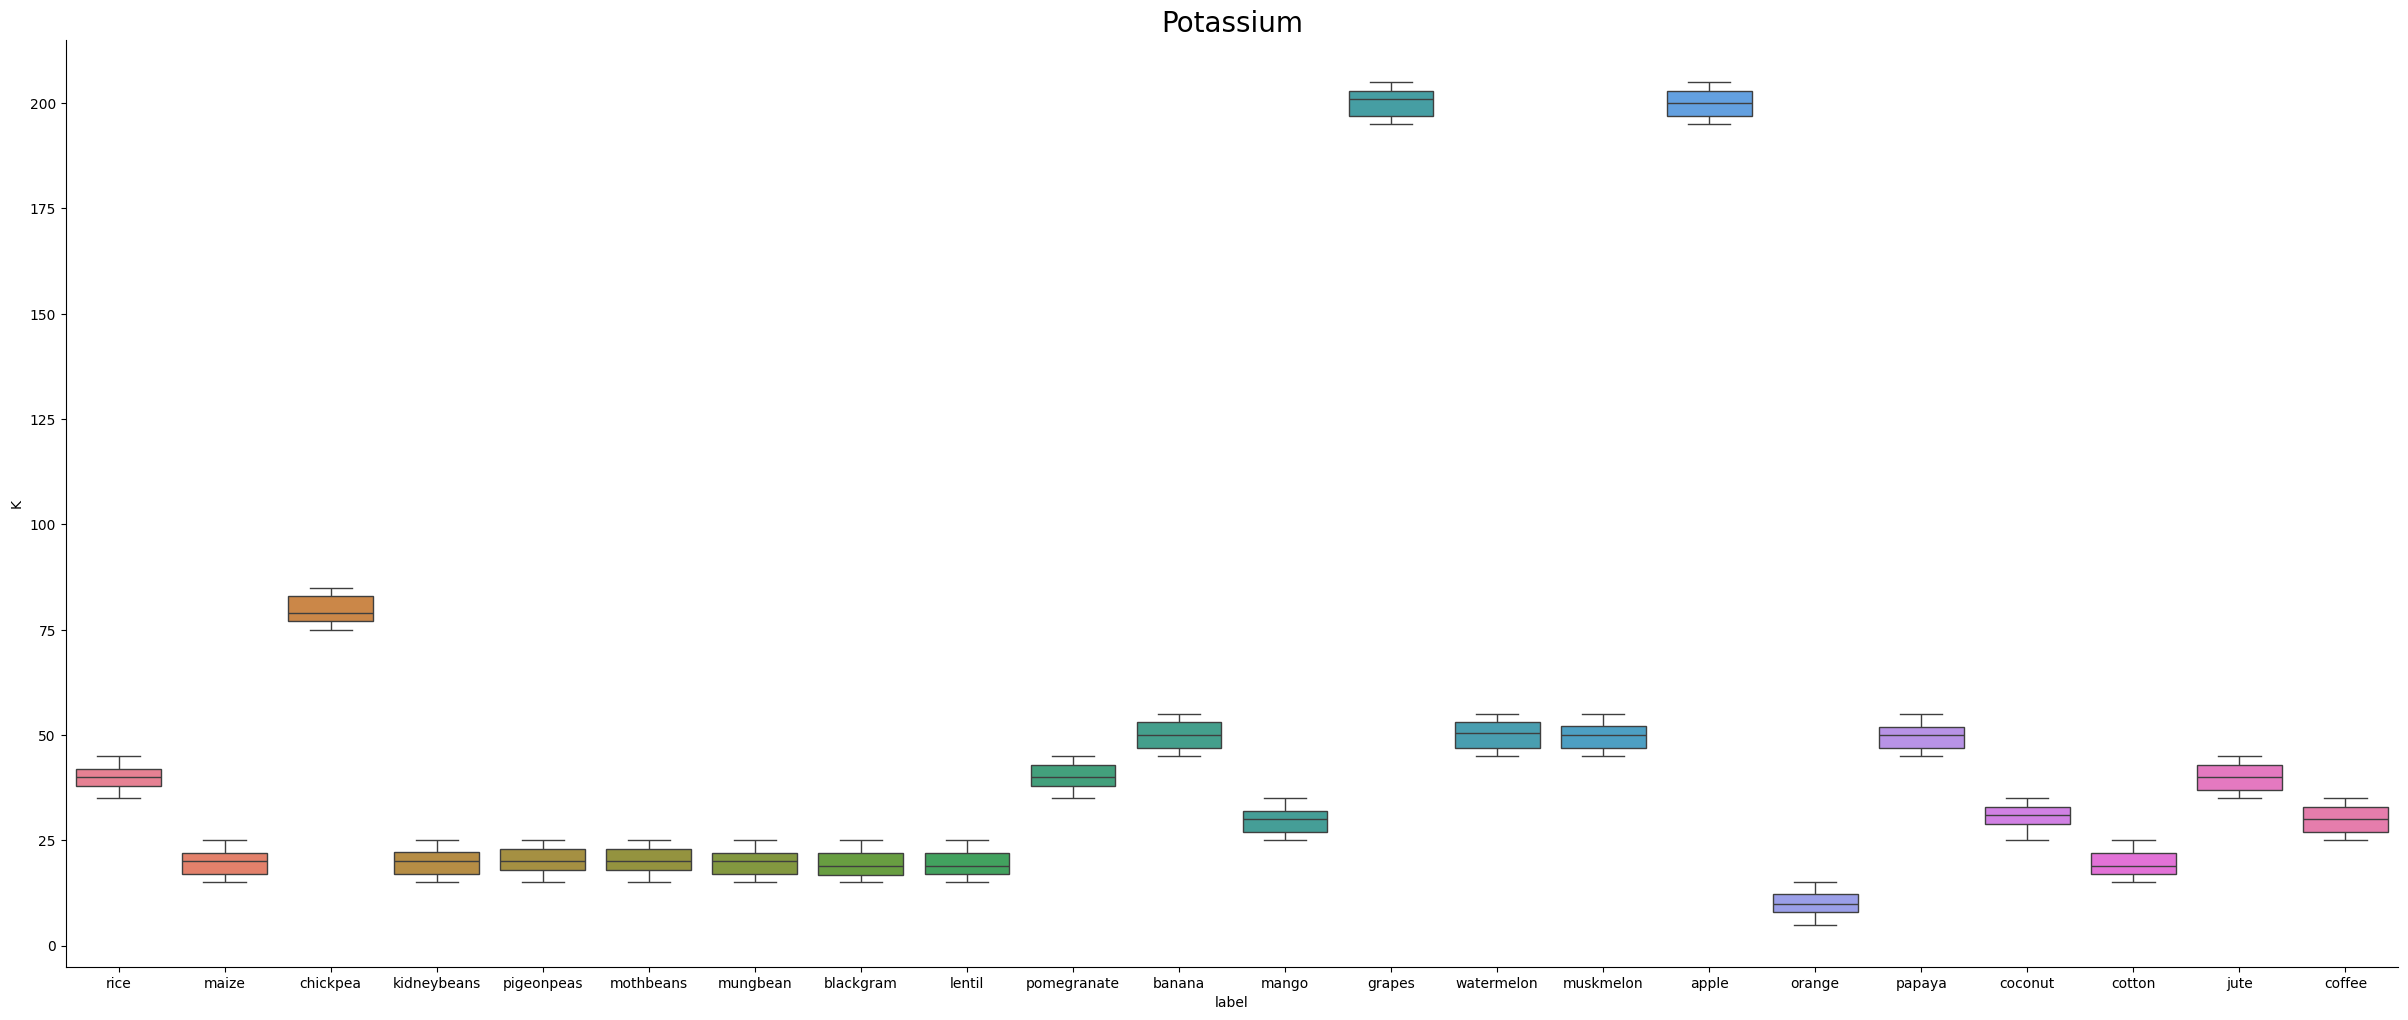

In [54]:
sns.catplot(data=df, x='label', y='K', kind='box', height=10, aspect=20/8.27,  hue='label')
plt.title("Potassium",size=20)
plt.show()

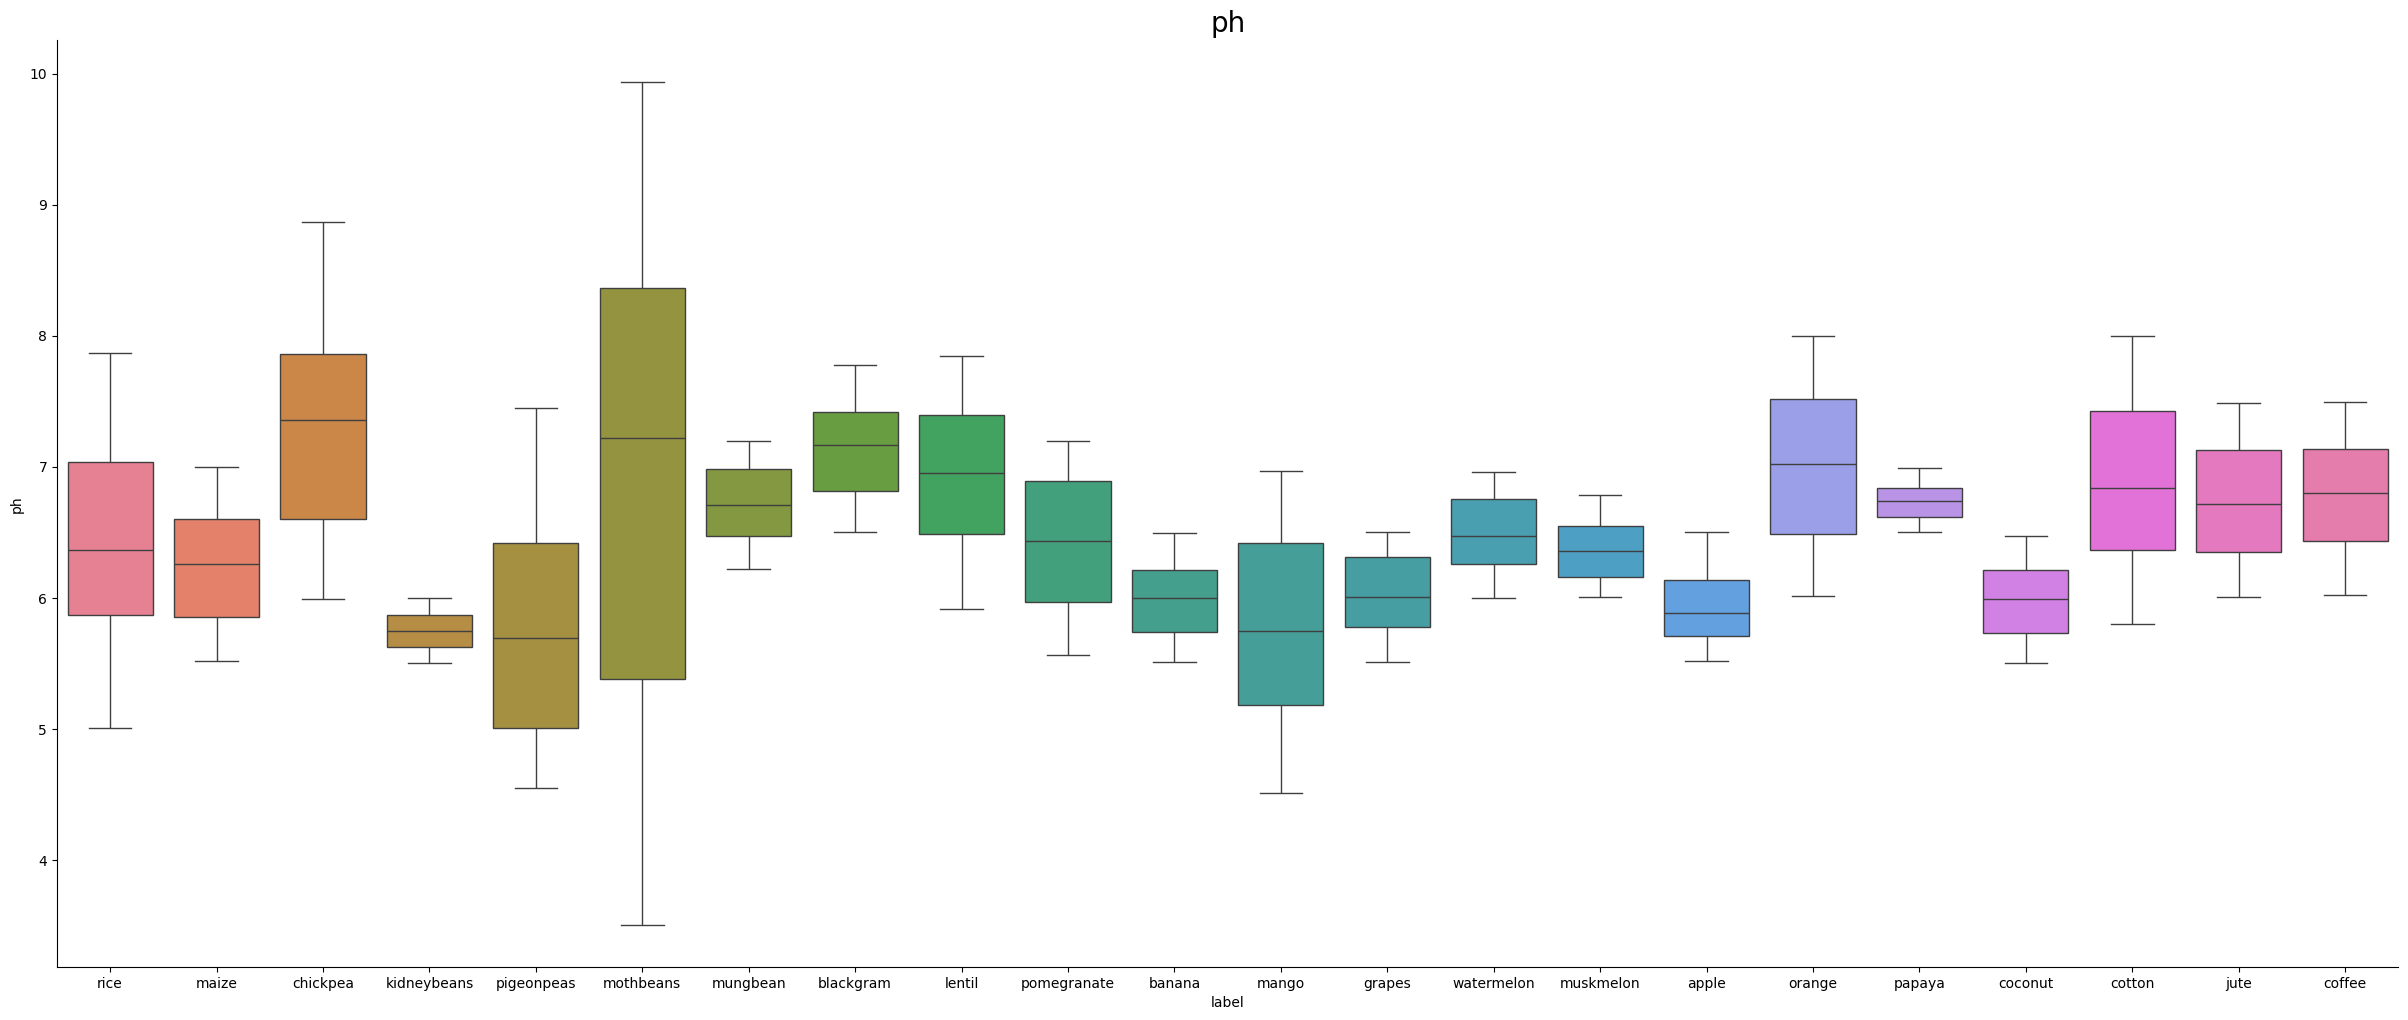

In [55]:
sns.catplot(data=df, x='label', y='ph', kind='box', height=10, aspect=20/8.27,  hue='label')
plt.title("ph",size=20)
plt.show()

Esses gráficos mostram que não há valores discrepantes presentes neste conjunto de dados

### **2.4. Vamos verificar através da Estatísticas**

In [58]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")

In [59]:
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - 

## **3.Predição**

In [60]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

### **3.1. Dividindo os dados de treino e de teste**

Definir as variaveis independentes - (x)

In [61]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


Definir a variável dependente (Y)

In [62]:
Y = df['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [63]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


### **3.2. Escolha do melhor modelo**

#### **3.2.1. Decision Tree, Support vector mechanism, Random forest**

In [64]:
a={'decision tree' : {
        'model' : DecisionTreeClassifier(criterion='gini'),
        'params':{'decisiontreeclassifier__splitter':['best','random']}
    },
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
   'k classifier':{
       'model':KNeighborsClassifier(),
       'params':{'kneighborsclassifier__n_neighbors':[5,10,20,25],'kneighborsclassifier__weights':['uniform','distance']}
   }
}

In [65]:
score=[]
details = []
best_param = {}
for mdl,par in a.items():
    pipe = make_pipeline(preprocessing.StandardScaler(),par['model'])
    res = model_selection.GridSearchCV(pipe,par['params'],cv=5)
    res.fit(x_train,y_train)
    score.append({
        'Model name':mdl,
        'Best score':res.best_score_,
        'Best param':res.best_params_
    })
    details.append(pd.DataFrame(res.cv_results_))
    best_param[mdl]=res.best_estimator_
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.987879,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.988485,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
2,random_forest,0.990909,{'randomforestclassifier__n_estimators': 10}
3,k classifier,0.971515,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."


In [66]:
details[0]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056901,0.009285,0.012920,0.003425,best,{'decisiontreeclassifier__splitter': 'best'},0.990909,0.987879,0.993939,0.987879,0.978788,0.987879,0.005071,1
1,0.021954,0.013508,0.007948,0.003297,random,{'decisiontreeclassifier__splitter': 'random'},0.951515,0.975758,0.951515,0.969697,0.963636,0.962424,0.009697,2


In [67]:
details[1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.269554,0.094811,0.026918,0.005894,1,rbf,"{'svc__C': 1, 'svc__kernel': 'rbf'}",0.969697,0.972727,0.993939,0.969697,0.981818,0.977576,0.009310,8
1,0.113832,0.003028,0.012084,0.000490,1,linear,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.978788,0.993939,0.987879,0.972727,0.990909,0.984848,0.007902,4
2,0.172644,0.005570,0.019512,0.003380,10,rbf,"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.978788,1.000000,0.993939,0.975758,0.993939,0.988485,0.009467,1
3,0.114342,0.003911,0.011307,0.001943,10,linear,"{'svc__C': 10, 'svc__kernel': 'linear'}",0.984848,0.981818,0.996970,0.975758,0.990909,0.986061,0.007323,2
4,0.174729,0.008048,0.017389,0.001045,100,rbf,"{'svc__C': 100, 'svc__kernel': 'rbf'}",0.972727,0.987879,0.990909,0.981818,0.993939,0.985455,0.007521,3
5,0.121616,0.003569,0.010094,0.000190,100,linear,"{'svc__C': 100, 'svc__kernel': 'linear'}",0.978788,0.984848,0.990909,0.969697,0.990909,0.983030,0.008040,6
6,0.175323,0.006974,0.016650,0.000284,1000,rbf,"{'svc__C': 1000, 'svc__kernel': 'rbf'}",0.975758,0.984848,0.993939,0.978788,0.987879,0.984242,0.006471,5
7,0.566347,0.323891,0.035775,0.017448,1000,linear,"{'svc__C': 1000, 'svc__kernel': 'linear'}",0.978788,0.984848,0.990909,0.969697,0.990909,0.983030,0.008040,6


In [69]:
details[2]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027837,0.009722,0.007744,0.002046,1,{'randomforestclassifier__n_estimators': 1},0.927273,0.954545,0.933333,0.939394,0.939394,0.938788,0.009071,3
1,0.059306,0.021406,0.009162,0.006228,5,{'randomforestclassifier__n_estimators': 5},0.987879,0.990909,0.993939,0.984848,0.990909,0.989697,0.003090,2
2,0.069301,0.010617,0.006099,0.000125,10,{'randomforestclassifier__n_estimators': 10},0.987879,1.000000,0.996970,0.987879,0.981818,0.990909,0.006639,1


In [70]:
details[3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013916,0.005557,0.051066,0.019288,5,uniform,"{'kneighborsclassifier__n_neighbors': 5, 'knei...",0.960606,0.969697,0.984848,0.951515,0.975758,0.968485,0.011595,2
1,0.007859,0.001949,0.008350,0.001893,5,distance,"{'kneighborsclassifier__n_neighbors': 5, 'knei...",0.972727,0.969697,0.984848,0.954545,0.975758,0.971515,0.009885,1
2,0.005644,0.000178,0.022160,0.001078,10,uniform,"{'kneighborsclassifier__n_neighbors': 10, 'kne...",0.936364,0.960606,0.975758,0.942424,0.969697,0.956970,0.015260,4
3,0.005638,0.000207,0.007627,0.000476,10,distance,"{'kneighborsclassifier__n_neighbors': 10, 'kne...",0.954545,0.969697,0.978788,0.945455,0.972727,0.964242,0.012332,3
4,0.006386,0.001566,0.028077,0.006321,20,uniform,"{'kneighborsclassifier__n_neighbors': 20, 'kne...",0.915152,0.924242,0.954545,0.912121,0.954545,0.932121,0.018739,7
5,0.005701,0.000738,0.009084,0.000806,20,distance,"{'kneighborsclassifier__n_neighbors': 20, 'kne...",0.930303,0.936364,0.972727,0.933333,0.963636,0.947273,0.017418,5
6,0.005626,0.000453,0.026263,0.004426,25,uniform,"{'kneighborsclassifier__n_neighbors': 25, 'kne...",0.896970,0.915152,0.948485,0.903030,0.936364,0.920000,0.019601,8
7,0.005963,0.001079,0.009596,0.000098,25,distance,"{'kneighborsclassifier__n_neighbors': 25, 'kne...",0.927273,0.936364,0.963636,0.927273,0.957576,0.942424,0.015332,6


In [68]:
score

[{'Model name': 'decision tree',
  'Best score': 0.9878787878787879,
  'Best param': {'decisiontreeclassifier__splitter': 'best'}},
 {'Model name': 'svm',
  'Best score': 0.9884848484848485,
  'Best param': {'svc__C': 10, 'svc__kernel': 'rbf'}},
 {'Model name': 'random_forest',
  'Best score': 0.9909090909090909,
  'Best param': {'randomforestclassifier__n_estimators': 10}},
 {'Model name': 'k classifier',
  'Best score': 0.9715151515151514,
  'Best param': {'kneighborsclassifier__n_neighbors': 5,
   'kneighborsclassifier__weights': 'distance'}}]

In [71]:
pd.DataFrame(score)

,Model name,Best score,Best param
0,decision tree,0.987879,{'decisiontreeclassifier__splitter': 'best'}
1,svm,0.988485,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
2,random_forest,0.990909,{'randomforestclassifier__n_estimators': 10}
3,k classifier,0.971515,"{'kneighborsclassifier__n_neighbors': 5, 'knei..."


In [72]:
for i in best_param.keys():
    print(f'{i} : {best_param[i].score(x_test,y_test)}')

decision tree : 0.9854545454545455
svm : 0.9872727272727273
random_forest : 0.990909090909091
k classifier : 0.98


#### **3.2.2 Melhor Modelo - Random forest**


In [73]:
predicted = best_param['random_forest'].predict(x_test)
predicted

array([12, 16, 16,  2, 16, 17,  8,  1,  2, 20, 18, 12,  4,  1, 19, 15,  9,
       14,  9,  0,  7,  6, 21,  8, 14, 13, 19,  6,  8,  8, 21,  8,  7, 15,
        3, 10, 15,  6,  8, 10, 19,  6, 13, 17, 13,  8, 21, 10, 17,  3, 18,
        7, 13,  3, 15,  4,  1,  1,  9,  4, 16, 15,  5, 21, 14,  5, 19, 16,
        0, 21, 10,  6, 11,  1,  0, 13,  2, 12,  0, 13,  2, 10,  7,  5,  9,
        1,  1,  9,  2, 17,  9,  6, 18,  2,  4,  6, 17, 15, 11, 15,  1, 12,
       17, 18, 11,  0,  8,  0,  5,  1, 13, 18,  6, 16, 14, 17, 10, 17, 11,
       13, 16, 16, 20, 18,  3, 19,  0,  6,  0,  5, 14,  8,  1,  7,  0, 13,
        8, 10, 18, 19, 12, 14, 20, 21,  3,  8,  6,  0,  0,  8, 18, 15, 19,
       12, 11, 10,  1, 10, 12,  9, 19, 18,  8,  6, 13,  8,  6,  7,  1,  5,
       18,  5,  7, 15, 11, 14, 16, 16, 21,  4, 17, 14, 13, 19,  6, 16, 11,
       12,  6, 15,  9, 13, 17, 12, 13, 15,  5, 21,  6,  6, 19,  7,  8, 13,
        3, 18, 13,  1, 10, 16,  1,  5,  2,  6, 20, 16,  4, 19, 18, 13, 17,
       21,  6,  8,  7,  8

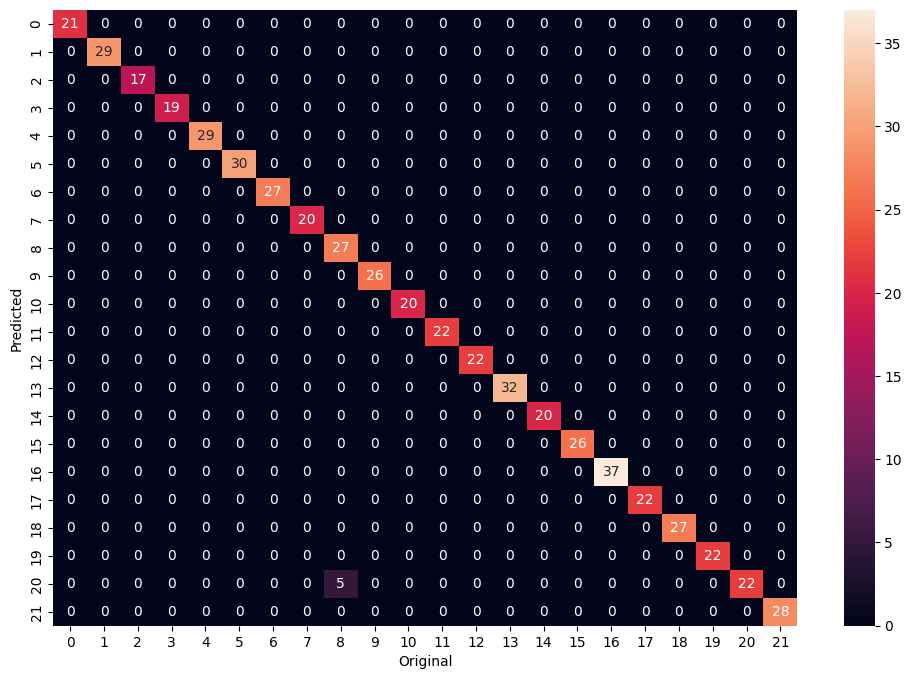

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

#### 3.2.3. Classificador *Bagging* para maior precisão **negrito**

In [75]:
pipe1 = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators = 10))
bag_model = BaggingClassifier(base_estimator=pipe1,n_estimators=100,
                              oob_score=True,random_state=0,max_samples=0.8)


In [76]:
bag_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('randomforestclassifier',
                                                  RandomForestClassifier(n_estimators=10))]),
                  max_samples=0.8, n_estimators=100, oob_score=True,
                  random_state=0)

In [77]:
bag_model.score(x_test,y_test)

0.9945454545454545

In [78]:
predict = bag_model.predict(x_test)

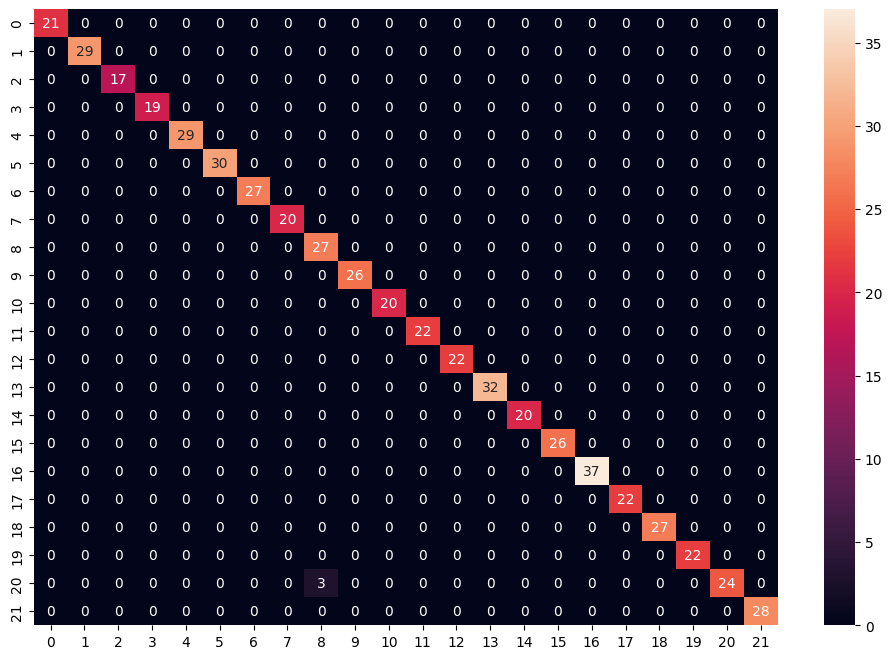

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.show()

## **4. Conclusão**

### **4.1. Mapeamento de valor**

O mapeamento de valores mostra qual valor pertence a qual cultura. Ajuda na leitura fácil do valor previsto. Ex: Se o valor previsto for 20, então pertence à colheita de arroz.

In [81]:
dha2 =pd.DataFrame(Y)
code = pd.DataFrame(dha2['label'].unique())

In [82]:
dha = pd.DataFrame(y)
encode = pd.DataFrame(dha[0].unique())
refer = pd.DataFrame()
refer['code']=code
refer['encode']=encode
refer

,code,encode
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


### **4.2. Relatório**

Pontuação para cada colheita.

In [83]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        20
           8       0.90      1.00      0.95        27
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        32
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        37
          17       1.00    